In [26]:
pip install ydata_profiling

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from ydata_profiling import ProfileReport


In [28]:
df=pd.read_csv('/content/loan_data.csv')
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [29]:
profile = ProfileReport(df, title="Profiling Report")

In [30]:
profile

Output hidden; open in https://colab.research.google.com to view.

In [31]:
from sklearn.preprocessing import PowerTransformer

# Instantiate PowerTransformer with Box-Cox method
pt_boxcox = PowerTransformer(method='box-cox', standardize=True)

# Apply Box-Cox transformation to 'days.with.cr.line' column
df['days.with.cr.line'] = pt_boxcox.fit_transform(df[['days.with.cr.line']])

print("Box-Cox transformation applied to 'days.with.cr.line' column.")

Box-Cox transformation applied to 'days.with.cr.line' column.


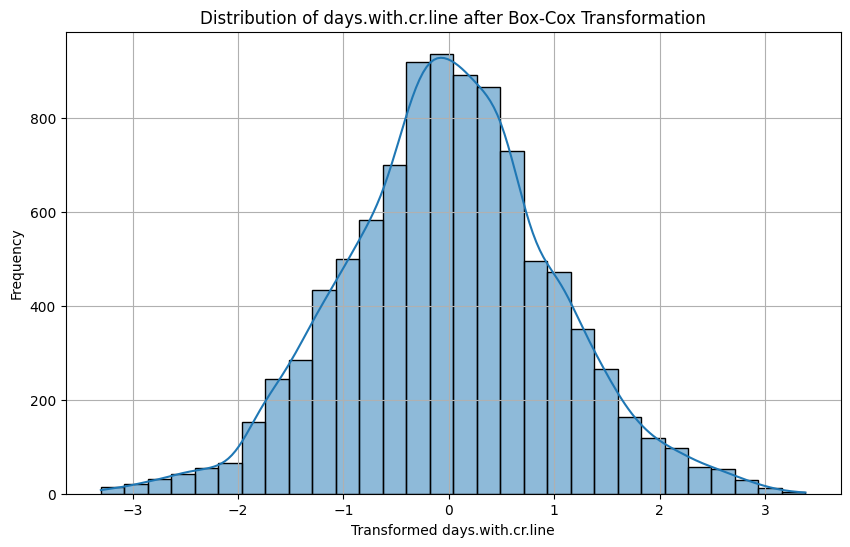

In [32]:
plt.figure(figsize=(10, 6))
sns.histplot(df['days.with.cr.line'], kde=True, bins=30)
plt.title('Distribution of days.with.cr.line after Box-Cox Transformation')
plt.xlabel('Transformed days.with.cr.line')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [34]:
df['installment'] = np.sqrt(df['installment'])
print("Square root transformation applied to 'installment' column.")

Square root transformation applied to 'installment' column.


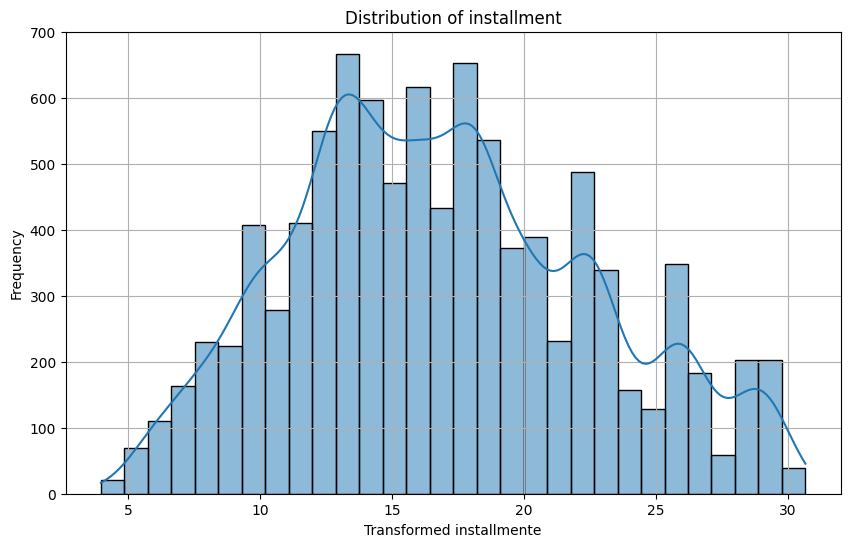

In [35]:
plt.figure(figsize=(10, 6))
sns.histplot(df['installment'], kde=True, bins=30)
plt.title('Distribution of installment')
plt.xlabel('Transformed installmente')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [40]:
import numpy as np
from sklearn.preprocessing import PowerTransformer

# Apply log1p transformation to 'revol.util'
df['revol.util'] = np.sqrt(df['revol.util'])
print("log1p transformation applied to 'revol.util' column.")



log1p transformation applied to 'revol.util' column.


In [42]:
df['revol.util'] = pt_boxcox.fit_transform(df[['revol.util']])

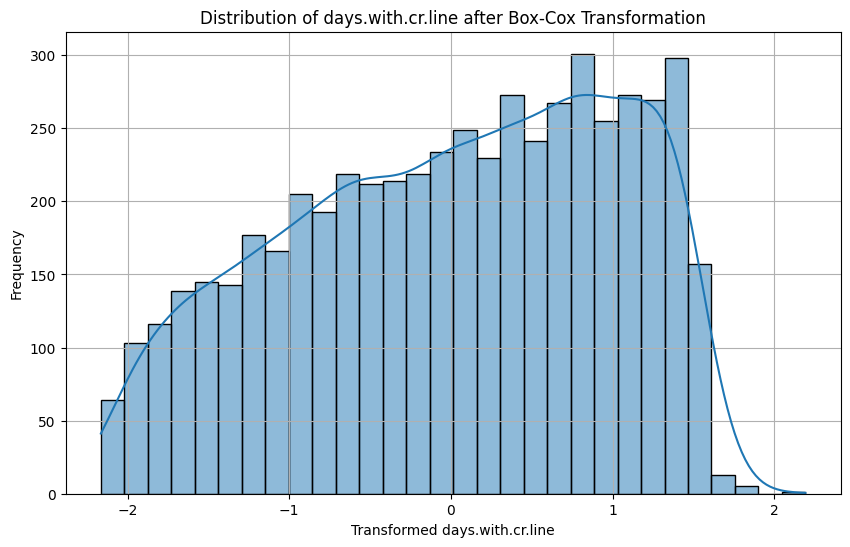

In [43]:
plt.figure(figsize=(10, 6))
sns.histplot(df['revol.util'], kde=True, bins=30)
plt.title('Distribution of days.with.cr.line after Box-Cox Transformation')
plt.xlabel('Transformed days.with.cr.line')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

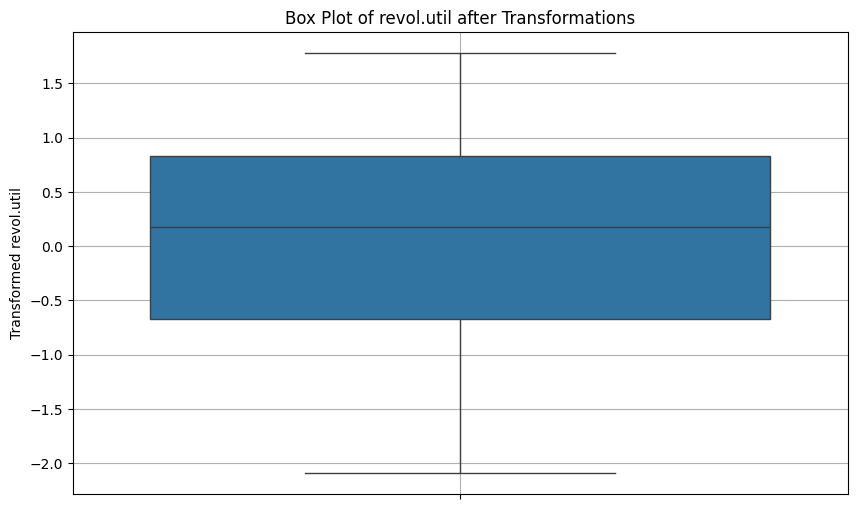

In [38]:
plt.figure(figsize=(10, 6))
sns.boxplot(y=df['revol.util'])
plt.title('Box Plot of revol.util after Transformations')
plt.ylabel('Transformed revol.util')
plt.grid(True)
plt.show()

In [44]:
profile = ProfileReport(df, title="Profiling Report")
profile

Output hidden; open in https://colab.research.google.com to view.

In [45]:
# One-hot encode the 'purpose' column
df = pd.get_dummies(df, columns=['purpose'], drop_first=True)

# Define features (X) and target (y)
X = df.drop('not.fully.paid', axis=1)
y = df['not.fully.paid']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

# Initialize and train the Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

print("Random Forest model trained successfully!")

Random Forest model trained successfully!


In [46]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Display classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Display confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.8358

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.99      0.91      2408
           1       0.40      0.03      0.05       466

    accuracy                           0.84      2874
   macro avg       0.62      0.51      0.48      2874
weighted avg       0.77      0.84      0.77      2874


Confusion Matrix:
[[2390   18]
 [ 454   12]]


To address the class imbalance, we will use **SMOTE (Synthetic Minority Over-sampling Technique)** to oversample the minority class (target = 1) in the training data. This technique generates synthetic samples for the minority class, helping the model to learn better from the underrepresented class without simply duplicating existing data points.

In [48]:
from imblearn.over_sampling import SMOTE

# Instantiate SMOTE
sm = SMOTE(random_state=42)

# Impute missing values in X_train with the median
# It's crucial to fit the imputer on X_train only and then transform both X_train and X_test if needed elsewhere.
# For SMOTE, we only need to clean X_train.
for col in X_train.columns:
    if X_train[col].isnull().any():
        median_val = X_train[col].median()
        X_train[col].fillna(median_val, inplace=True)

# Apply SMOTE to the training data
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

print(f"Original training set shape: {X_train.shape}, {y_train.shape}")
print(f"Resampled training set shape: {X_train_res.shape}, {y_train_res.shape}")
print(f"Distribution of original y_train:\n{y_train.value_counts()}")
print(f"Distribution of resampled y_train:\n{y_train_res.value_counts()}")

Original training set shape: (6704, 18), (6704,)
Resampled training set shape: (11274, 18), (11274,)
Distribution of original y_train:
not.fully.paid
0    5637
1    1067
Name: count, dtype: int64
Distribution of resampled y_train:
not.fully.paid
0    5637
1    5637
Name: count, dtype: int64


Now, let's retrain the Random Forest model using the SMOTE-resampled training data (`X_train_res`, `y_train_res`) and then evaluate its performance again on the original `X_test`, `y_test`.

In [49]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize and train a new Random Forest Classifier with resampled data
rf_model_resampled = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model_resampled.fit(X_train_res, y_train_res)

print("Random Forest model trained successfully with resampled data!")

# Make predictions on the original test set
y_pred_resampled = rf_model_resampled.predict(X_test)

# Calculate accuracy
accuracy_resampled = accuracy_score(y_test, y_pred_resampled)
print(f"\nAccuracy with resampled data: {accuracy_resampled:.4f}")

# Display classification report
print("\nClassification Report with resampled data:")
print(classification_report(y_test, y_pred_resampled))

# Display confusion matrix
print("\nConfusion Matrix with resampled data:")
print(confusion_matrix(y_test, y_pred_resampled))

Random Forest model trained successfully with resampled data!

Accuracy with resampled data: 0.7717

Classification Report with resampled data:
              precision    recall  f1-score   support

           0       0.86      0.87      0.87      2408
           1       0.27      0.24      0.25       466

    accuracy                           0.77      2874
   macro avg       0.56      0.56      0.56      2874
weighted avg       0.76      0.77      0.77      2874


Confusion Matrix with resampled data:
[[2106  302]
 [ 354  112]]


In [51]:
import pandas as pd

# Get feature importances from the trained model
importances = rf_model_resampled.feature_importances_

# Get feature names from the training data used for the model
feature_names = X_train_res.columns

# Create a Series for better visualization
feature_importance_series = pd.Series(importances, index=feature_names)

# Sort the features by importance in descending order
sorted_feature_importance = feature_importance_series.sort_values(ascending=False)

print("Feature Importances (Random Forest Model with SMOTE):")
print(sorted_feature_importance)

Feature Importances (Random Forest Model with SMOTE):
int.rate                      0.111746
fico                          0.102506
revol.bal                     0.095678
credit.policy                 0.091096
dti                           0.085215
days.with.cr.line             0.084280
installment                   0.082885
log.annual.inc                0.080586
revol.util                    0.076142
inq.last.6mths                0.041312
purpose_small_business        0.037500
purpose_debt_consolidation    0.027714
purpose_credit_card           0.021005
purpose_home_improvement      0.017721
delinq.2yrs                   0.017475
purpose_educational           0.013400
purpose_major_purchase        0.007317
pub.rec                       0.006423
dtype: float64


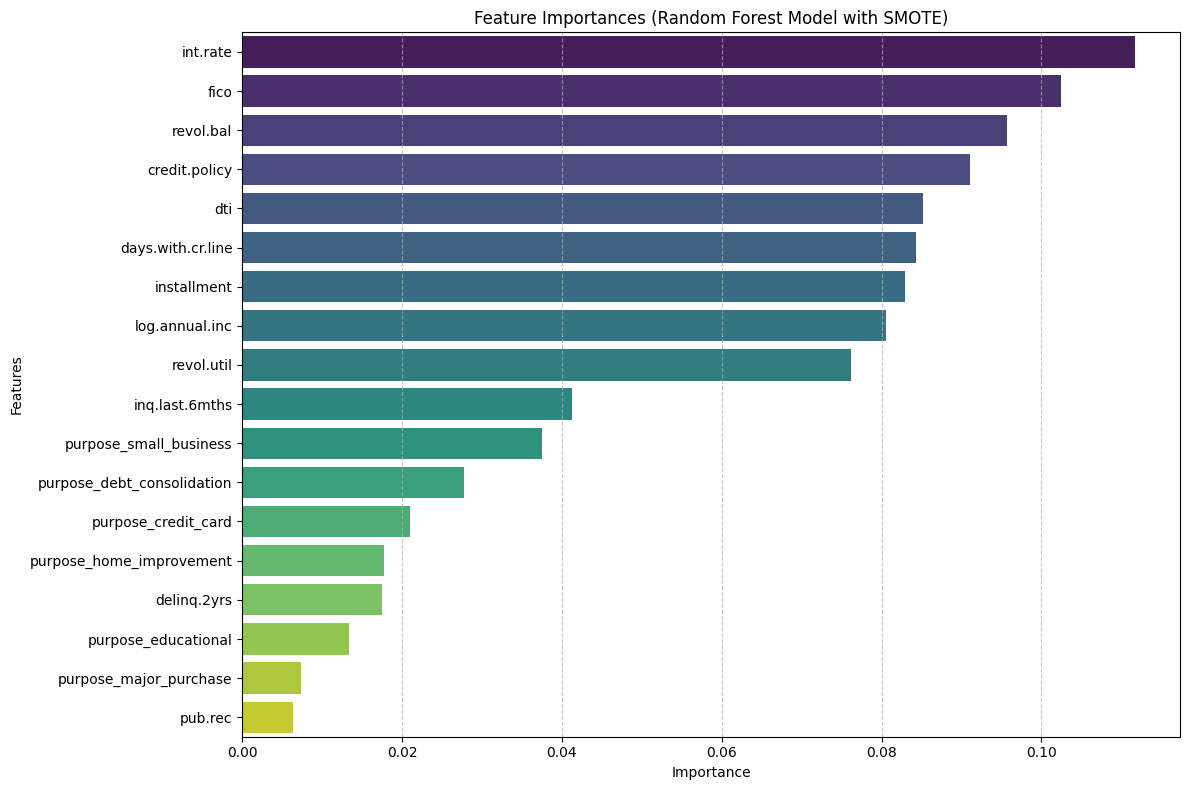

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.barplot(x=sorted_feature_importance.values, y=sorted_feature_importance.index, palette='viridis')
plt.title('Feature Importances (Random Forest Model with SMOTE)')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()